# Title 1 Designation Evaluation with Machine Learning
**Author**
Carlton Duke

### Project Goals
My goal in this project is to use the Common Core of Data (CCD) from the Department of Education to evaluate and predict poverty-stricken schools and compare the prediction against Title 1 designation.

### Data Gathering
The data for this project is pulled directly from the Department of Education's website https://nces.ed.gov/ccd/. I will be focusing on public schools in the state of Texas from 2009-10. I used the table generator to create a csv file. I selected columns that we thought pertinent to the project and ones that could provide insight into Title 1 designation. My data contains school identification information, race/ethnicity information, enrollment numbers, special program figures (reduced lunch, free lunch), Title 1 eligibility, number of teachers, and teacher/student ratios.

**Importing libraries for use in this notebook**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Read the csv file using pandas read_csv() method**

In [2]:
df= pd.read_csv("Project_Data.csv")
df.head()

,SCHOOL_NAME,STATE,SCHOOL_NAME.1,NCES_SCHOOL_ID,AGENCY_NAME,AGENCY_ID,RACE/ETHNICITY_CATS,URBAN_CENTRIC_LOCALE,SCHOOLWIDE_TITLE1,TITLE1_ELIGIBLE,...,AMERICAN_INDIAN_ALASKAN_NATIVE,ASIAN_PACIFIC_ISLANDER,HISPANIC,BLACK/AFRICAN_AMERICAN,WHITE,HAWAIIAN,2_OR_MORE_RACES,TOTAL_RACE,FULLTIME_TEACHERS,PUPIL_TEACHER_RATIO
0,3D ACADEMY,Texas,3D ACADEMY,4.820000e+11,DONNA ISD,4817390,Reported 5 categories,21-Suburb: Large,1-Yes,1-Yes,...,0,0,125,0,2,†,†,127,7,18.14
1,3RD H S,Texas,3RD H S,4.850000e+11,WYLIE ISD,4846530,Reported 5 categories,21-Suburb: Large,†,†,...,†,†,†,†,†,†,†,†,†,†
2,6TH GRADE CENTER,Texas,6TH GRADE CENTER,4.820000e+11,GREENVILLE ISD,4821720,Reported 5 categories,32-Town: Distant,1-Yes,1-Yes,...,1,5,118,60,144,†,†,328,21.5,15.26
3,7TH H S - NORTHEAST,Texas,NEW ALTERNATIVE H S,4.840000e+11,ROUND ROCK ISD,4838080,Reported 5 categories,12-City: Mid-size,†,†,...,†,†,†,†,†,†,†,†,†,†
4,A & M CONS H S,Texas,A & M CONS H S,4.810000e+11,COLLEGE STATION ISD,4807350,Reported 5 categories,13-City: Small,†,2-No,...,9,242,396,338,1745,†,†,2730,175.08,15.59


In [3]:
df.shape

(9166, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 9166 entries, 0 to 9165

Data columns (total 26 columns):

 #   Column                          Non-Null Count  Dtype  

---  ------                          --------------  -----  

 0   SCHOOL_NAME                     9166 non-null   object 

 1   STATE                           9166 non-null   object 

 2   SCHOOL_NAME.1                   9166 non-null   object 

 3   NCES_SCHOOL_ID                  9166 non-null   float64

 4   AGENCY_NAME                     9166 non-null   object 

 5   AGENCY_ID                       9166 non-null   int64  

 6   RACE/ETHNICITY_CATS             9166 non-null   object 

 7   URBAN_CENTRIC_LOCALE            9166 non-null   object 

 8   SCHOOLWIDE_TITLE1               9166 non-null   object 

 9   TITLE1_ELIGIBLE                 9166 non-null   object 

 10  TOTAL_STUDENTS                  9166 non-null   object 

 11  FREE_LUNCH                      9166 non-null   object 

 12  REDUCED_LUNCH    

### Data Cleaning

Given the data, it must be checked. NAN value replacement must happen if neccessary.

In [5]:
df.isna().sum()

SCHOOL_NAME                       0
STATE                             0
SCHOOL_NAME.1                     0
NCES_SCHOOL_ID                    0
AGENCY_NAME                       0
AGENCY_ID                         0
RACE/ETHNICITY_CATS               0
URBAN_CENTRIC_LOCALE              0
SCHOOLWIDE_TITLE1                 0
TITLE1_ELIGIBLE                   0
TOTAL_STUDENTS                    0
FREE_LUNCH                        0
REDUCED_LUNCH                     0
FREE_AND_REDUCED_LUNCH            0
MALE_STUDENTS                     0
FEMALE_STUDENTS                   0
AMERICAN_INDIAN_ALASKAN_NATIVE    0
ASIAN_PACIFIC_ISLANDER            0
HISPANIC                          0
BLACK/AFRICAN_AMERICAN            0
WHITE                             0
HAWAIIAN                          0
2_OR_MORE_RACES                   0
TOTAL_RACE                        0
FULLTIME_TEACHERS                 0
PUPIL_TEACHER_RATIO               0
dtype: int64

Considering there are no NAN values, uneccessary columns are dropped next. Schools will be identified by their NCES ID, so all other identifying information can be dropped. 

In [6]:
df = df.drop(columns =['SCHOOL_NAME','STATE','SCHOOL_NAME.1','AGENCY_NAME','AGENCY_ID','RACE/ETHNICITY_CATS','URBAN_CENTRIC_LOCALE',
                       'TITLE1_ELIGIBLE','AMERICAN_INDIAN_ALASKAN_NATIVE','HAWAIIAN','2_OR_MORE_RACES','TOTAL_RACE','NCES_SCHOOL_ID'])
#df.head()

Let's see the shape of the data to see what's been selected.

In [7]:
df = df[df.SCHOOLWIDE_TITLE1 != '†']
df = df[df.TOTAL_STUDENTS != '†']
df = df[df.FREE_LUNCH != '†']
df = df[df.REDUCED_LUNCH != '†']
df = df[df.FREE_AND_REDUCED_LUNCH != '†']
df = df[df.FULLTIME_TEACHERS != '†']
df = df[df.PUPIL_TEACHER_RATIO != '†']

df = df[df.SCHOOLWIDE_TITLE1 != '‡']
df = df[df.TOTAL_STUDENTS != '‡']
df = df[df.FREE_LUNCH != '‡']
df = df[df.REDUCED_LUNCH != '‡']
df = df[df.FREE_AND_REDUCED_LUNCH != '‡']
df = df[df.FULLTIME_TEACHERS != '‡']
df = df[df.PUPIL_TEACHER_RATIO != '‡']

df = df[df.SCHOOLWIDE_TITLE1 != '–']
df = df[df.TOTAL_STUDENTS != '–']
df = df[df.FREE_LUNCH != '–']
df = df[df.REDUCED_LUNCH != '–']
df = df[df.FREE_AND_REDUCED_LUNCH != '–']
df = df[df.FULLTIME_TEACHERS != '–']
df = df[df.PUPIL_TEACHER_RATIO != '–']

df.head()

,SCHOOLWIDE_TITLE1,TOTAL_STUDENTS,FREE_LUNCH,REDUCED_LUNCH,FREE_AND_REDUCED_LUNCH,MALE_STUDENTS,FEMALE_STUDENTS,ASIAN_PACIFIC_ISLANDER,HISPANIC,BLACK/AFRICAN_AMERICAN,WHITE,FULLTIME_TEACHERS,PUPIL_TEACHER_RATIO
0,1-Yes,127,81,4,85,48,79,0,125,0,2,7,18.14
2,1-Yes,328,0,36,36,162,166,5,118,60,144,21.5,15.26
6,1-Yes,449,311,36,347,238,211,2,331,22,94,31.88,14.08
7,1-Yes,856,643,77,720,455,401,2,326,290,238,46.58,18.38
8,1-Yes,256,145,35,180,127,129,5,116,20,114,25.13,10.19


Let's see the shape of the data.

In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>

Int64Index: 6564 entries, 0 to 9165

Data columns (total 13 columns):

 #   Column                  Non-Null Count  Dtype 

---  ------                  --------------  ----- 

 0   SCHOOLWIDE_TITLE1       6564 non-null   object

 1   TOTAL_STUDENTS          6564 non-null   object

 2   FREE_LUNCH              6564 non-null   object

 3   REDUCED_LUNCH           6564 non-null   object

 4   FREE_AND_REDUCED_LUNCH  6564 non-null   object

 5   MALE_STUDENTS           6564 non-null   object

 6   FEMALE_STUDENTS         6564 non-null   object

 7   ASIAN_PACIFIC_ISLANDER  6564 non-null   object

 8   HISPANIC                6564 non-null   object

 9   BLACK/AFRICAN_AMERICAN  6564 non-null   object

 10  WHITE                   6564 non-null   object

 11  FULLTIME_TEACHERS       6564 non-null   object

 12  PUPIL_TEACHER_RATIO     6564 non-null   object

dtypes: object(13)

memory usage: 717.9+ KB


(6564, 13)

6594 rows with 19 columns has been selected.

## Feature Normalization and Selection

After cleaning up the data, I normalize the data we are going to use for modeling. The column SCHOOLWIDE_TITLE1 needs to be normalized. 1-Yes will become 1 and 2-NO will become 0. A column will be created to find the percentage of students on free and reduced lunch out of total students.

In [9]:
df = df.replace("1-Yes",1)
df = df.replace("2-No",0)
#df.head()

Next, I created a column that shows the percentage of students on free or reduced lunch out of total students. This information can be used to determine the poverty level of a school. I dropped the columns pertaining to free and reduced lunch.

In [10]:
df['PERCENT_FREE_OR_REDUCED_LUNCH'] = (df['FREE_AND_REDUCED_LUNCH'].astype(int) / df['TOTAL_STUDENTS'].astype(int)) * 100
df.drop(columns=['FREE_LUNCH','REDUCED_LUNCH','FREE_AND_REDUCED_LUNCH'], inplace=True)
#df.head()

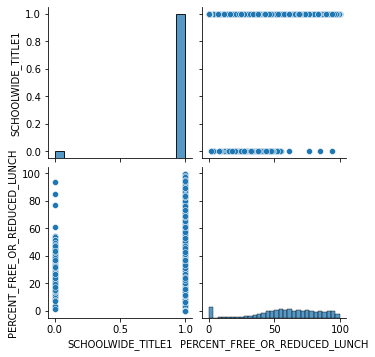

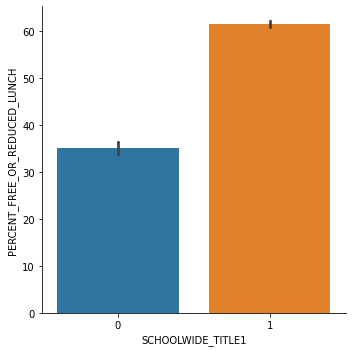

In [11]:
sns.pairplot(df)
sns.catplot(data=df, y='PERCENT_FREE_OR_REDUCED_LUNCH',x='SCHOOLWIDE_TITLE1',kind='bar')

New labels needed to be created to indicate poverty level. I used the percent free or reduced lunch as a proxy of poverty level. The labels are as follows: 2 - SP - Strict Poverty (high threshold); 1 - HP - High Poverty (more inclusive), and 0 - no poverty.

In [12]:
df['HIGH_POVERTY'] = df.PERCENT_FREE_OR_REDUCED_LUNCH.apply(lambda x:0 if x<40 else (1 if x<60 else 0))
df['STRICT_POVERTY'] = df.PERCENT_FREE_OR_REDUCED_LUNCH.apply(lambda x:0 if x<60 else 1) 

This heatmap helps find correlation between features.

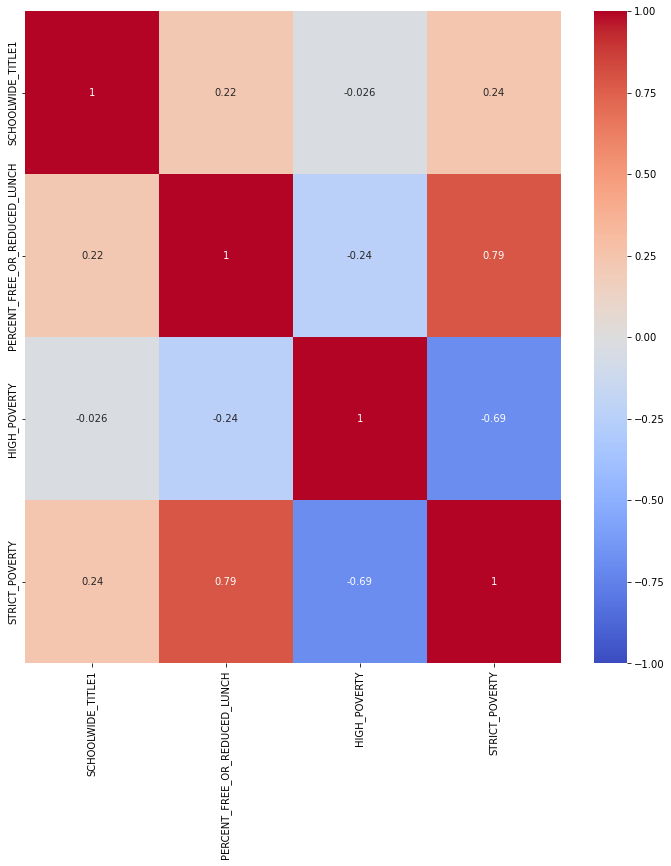

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=-1)

col = ["PERCENT_FREE_OR_REDUCED_LUNCH", "FULLTIME_TEACHERS", "PUPIL_TEACHER_RATIO","PERCENT_FREE_OR_REDUCED_LUNCH"]
df.drop(columns=col, inplace=True)

## Figures and Exploratory Data Analysis

These vigures visualizing the labels help show results. The first one is a cat plot that shows that Title 1 schools have more poverty on average which is to be expected.

#### High Poverty & Strict Poverty

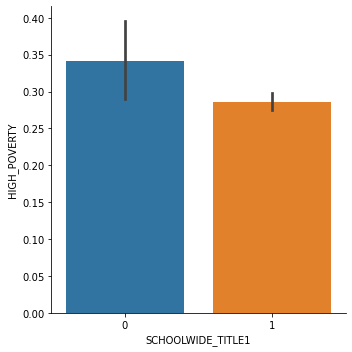

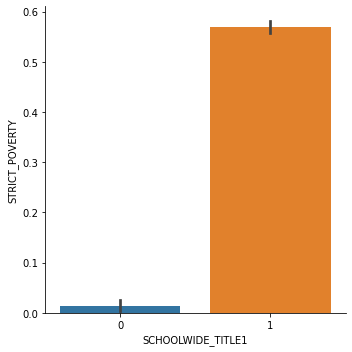

In [14]:
sns.catplot(data=df, y='HIGH_POVERTY',x='SCHOOLWIDE_TITLE1',kind='bar')
sns.catplot(data=df, y='STRICT_POVERTY',x='SCHOOLWIDE_TITLE1',kind='bar')

#### Correlation Heatmap

<AxesSubplot:>

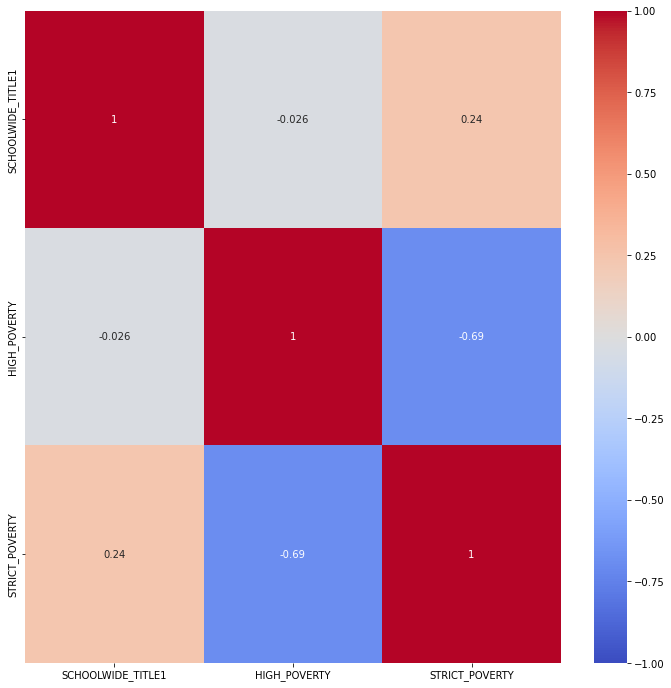

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=-1)

## Data Modeling - Logistic Regression

#### Setup Data for Modeling

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y1 = df.SCHOOLWIDE_TITLE1.values
x1 = df[[i for i in list(df.columns) if i != 'SCHOOLWIDE_TITLE1']].values

y2 = df.STRICT_POVERTY.values
x2 = df[[i for i in list(df.columns) if i != 'STRICT_POVERTY']].values

y3 = df.HIGH_POVERTY.values
x3 = df[[i for i in list(df.columns) if i != 'HIGH_POVERTY']].values

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1,y1, test_size=.2, random_state=1, stratify=y1)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2,y2, test_size=.2, random_state=1, stratify=y2)
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x3,y3, test_size=.2, random_state=1, stratify=y3)

#### Train Model | Schoolwide Title1

Finally, data modeleing. The model used here will be logistic regression. This created a model to predict values y for column SCHOOLWIDE_TITLE1.

In [17]:
clf=LogisticRegression()

clf.fit(xtrain1,ytrain1)

print(clf.score(xtest1,ytest1))

ypred=clf.predict(xtest1)

0.9535415079969536


D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


#### Train Model | Strict Poverty

Then create a logistic regression model to predict values y for Strict Poverty.

In [18]:
clf = LogisticRegression()

clf.fit(xtrain2,ytrain2)

print(clf.score(xtest2,ytest2))

ypred=clf.predict(xtest2)

0.8400609291698401


D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


#### Train Model | High Poverty

This will create a logistic regression model to predict values y for High Poverty.

In [19]:
clf = LogisticRegression()

clf.fit(xtrain3,ytrain3)

print(clf.score(xtest3,ytest3))

ypred=clf.predict(xtest3)

0.8796648895658796


D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


## Compare Models

In [20]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

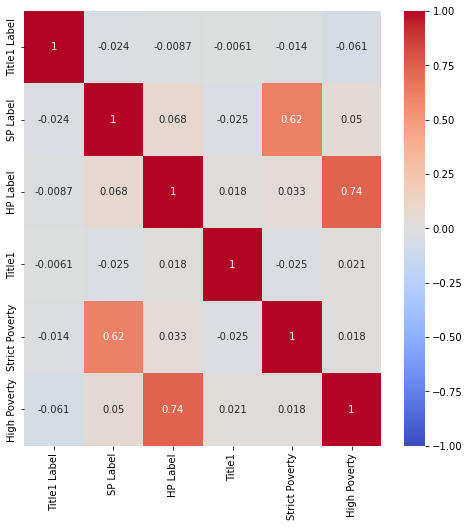

In [21]:
# Predict the title 1 designation label
ypred1=clf.predict(xtest1)

# Predict the strict poverty label
ypred2=clf.predict(xtest2)

# Predict the high poverty label
ypred3=clf.predict(xtest3)

labels=[0,1]
newdf = pd.DataFrame({'Title1 Label':ytest1,'SP Label':ytest2, 'HP Label':ytest3,'Title1':ypred1, 'Strict Poverty':ypred2, 'High Poverty':ypred3}) 

# Plot the correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(newdf.corr(),annot=True,cmap='coolwarm',vmin=-1)


## Exploratory Data & Model Analysis

##### Feature Standardization

In order to compare features on the same scale, I needed to standardize their values. For the poverty index, I put the number of students in special programs over the total number of students. This gave a value from 0-1 that could be used to evaulate a school's poverty level. I also relabeled schools that were Title 1 to 1 and those that weren't to 0. In order to get rid of null values we first used df.isna().sum() to see if there were any cells that didn't have any contents. Every cell did have something. However, some of the contents were not usable ('‡', '†', '-') so I dropped the rows containing those cells.

##### Feature Selection 

I dropped all variables except for 10 as I saw these variables would give the best correlation for the models. I reduced the number of input variables to both reduce the computational cost of the modeling and improve the performance of the model. I cleaned up the features with a high percentage of not applicable values and normalized the data for modeling. I tried to use Agency_Name and Agency_ID in the feature selection but, could find no correlation for the models we tried to make so we dropped them.

##### Machine Learning Algorithm

I went with a supervised machine learning algorithm because the problem hinges on the use of labeled data. There are too many features and variation between the columns for unsupervised to be feasible.

A classification algorithm seems like the good choice in this scenario, and was what we explored intitially. I tried Linear SVC first, because we were predicting a category, had labeled data, and had less than 100k data samples. Despite this, the algorithm was still too performance heavy, taking up to thirty minutes to train a single model. Considering that I was training one for each ground truth label, that was not acceptable. Following that, I attempted KNneighbors, but continually ran into issues like overfitting. After adjusting the data for some time, I were unable to resolve this issue.

I considered linear regression, but considering that my "Strict Poverty" and "High Poverty" labels were based on hard-coded thresholds, I went with logistic regression. It was the best for binomial classification. It was the best trade-off between effciency and accuracy compared to my previous model attempts.


##### Final Selection Pipeline & Model Evaluation 

I decided on linear regression as our final model selection. I considered LinearSVN and KNNeighbor, as both were better suited to classification. Linear regression was my final choice because it most consistently had the highest classification accuracy compared to the other models, and considering I had a decent number of features (9), I wanted a model that accounted for them.

After evaluating the model on previously unseen test data, I saw the following results:

In [38]:
# Title1                        # Strict Poverty           # High Poverty
print(clf.score(xtest1,ytest1), clf.score(xtest2,ytest2), clf.score(xtest3,ytest3))

0.952018278750952 0.8095963442498096 0.8796648895658796


For classifying schools as Title 1 designated: **% 95**

For classifying schools as Strict Poverty:  **% 81**

For classifying schools as High Poverty: **% 88**